In [3]:
import pandas as pd
import glob

def combine_excel_files_vertically(directory_path):
    # Step 1: Get a list of all Excel files in the specified directory
    excel_files = glob.glob(f'{directory_path}/*.xlsx')
    
    # Step 2: Initialize an empty list to store DataFrames
    dfs = []

    # Step 3: Loop through each Excel file and append its data to the list
    for file in excel_files:
        df = pd.read_excel(file)
        dfs.append(df)

    # Step 4: Use pandas.concat to combine all DataFrames in the list vertically
    combined_df = pd.concat(dfs, axis=0, ignore_index=False)

    return combined_df

# Example usage:
directory_path = '/home/majd/Desktop/Arbeit/Project'  # Replace with the actual path
result_df = combine_excel_files_vertically(directory_path)

# Print the combined DataFrame


In [2]:
result_df.columns 

NameError: name 'result_df' is not defined

In [9]:
result_df.shape

(167879, 49)

In [5]:
result_df.describe()

Line          TrnID           Min    OpThreshold  \
count  167879.000000  167879.000000  1.678790e+05  167879.000000   
mean    28767.631848      46.314226  6.485697e+07       3.565616   
std     21398.265768      35.496122  2.842577e+04       1.742247   
min         1.000000       1.000000  6.478050e+07       0.000000   
25%      9958.000000      17.000000  6.483455e+07       2.000000   
50%     24328.000000      39.000000  6.487055e+07       3.000000   
75%     45313.000000      68.000000  6.488011e+07       5.000000   
max     77855.000000     203.000000  6.488402e+07       6.000000   

        ClksThisMin       tWUTrisk         Start      Time (m)      Time (h)  \
count  167879.00000  167879.000000  1.678790e+05  1.678790e+05  1.678790e+05   
mean     3672.33984       0.703834  5.952768e+06  1.653547e-03  6.889778e-05   
std      1866.63405       1.770682  3.448259e+06  9.578496e-04  3.991040e-05   
min         6.00000       0.000000  1.400000e+01  3.888889e-09  1.620370e-10   
25%      2465.00000       0.000000  2.981200e+06  8.281111e-04  3.450463e-05   
50%      3351.00000       0.000000  5.929346e+06  1.647041e-03  6.862669e-05   
75%      4476.00000       0.000000  8.924592e+06  2.479053e-03  1.032939e-04   
max     15870.00000       7.000000  1.199748e+07  3.332634e-03  1.388597e-04   

        Time (h) *5  ...    avclF0    avclF1        avPkIPI  BeforeIPIratio  \
count  1.678790e+05  ...  167879.0  167879.0  167879.000000   167879.000000   
mean   3.444889e-04  ...       0.0       0.0      33.044008        2.260606   
std    1.995520e-04  ...       0.0       0.0       7.157250        1.024153   
min    8.101852e-10  ...       0.0       0.0      27.000000        0.000000   
25%    1.725231e-04  ...       0.0       0.0      30.000000        1.980000   
50%    3.431334e-04  ...       0.0       0.0      31.000000        2.220000   
75%    5.164695e-04  ...       0.0       0.0      32.000000        2.830000   
max    6.942987e-04  ...       0.0       0.0     182.000000        7.330000   

         PreIPIratio  Post1IPIratio  Post2IPIratio    EndIPIratio  EncSpN  \
count  167879.000000  167879.000000  167879.000000  167879.000000     0.0   
mean        0.996958       0.965777       0.889899       1.002912     NaN   
std         0.140555       0.094583       0.341425       0.028212     NaN   
min         0.000000       0.000000       0.000000       0.000000     NaN   
25%         0.990000       0.950000       0.960000       0.990000     NaN   
50%         1.010000       0.980000       0.990000       1.000000     NaN   
75%         1.030000       1.000000       1.010000       1.020000     NaN   
max         4.900000       1.870000       2.140000       1.860000     NaN   

         Time (s).1  
count  1.561610e+05  
mean   9.917755e-02  
std    5.738258e-02  
min    2.333333e-07  
25%    4.968955e-02  
50%    9.896733e-02  
75%    1.484455e-01  
max    1.999580e-01  

[8 rows x 38 columns]

In [7]:
X_Train = result_df[['NofClx', 'nActualClx', 'medianKHz', 'avEndF',
       'nRisingIPIs']]

result_df['HP'].fillna(0, inplace=True)  # Replace NaN in 'HP' column with 0
result_df['PAL'].fillna(0, inplace=True)  # Replace NaN in 'PAL' column with 0
# Assuming result_df is your DataFrame
result_df['HP'].replace('?', 1, inplace=True)
result_df['PAL'].replace('?', 0, inplace=True)

Y_Train = result_df[['HP', 'PAL']]


In [11]:
import pandas as pd

# Assuming result_df is your DataFrame
value_counts_hp = result_df['HP'].value_counts()
value_counts_pal = result_df['PAL'].value_counts()

# Display the counts for 'HP' column
print("Counts for 'HP' column:")
print(value_counts_hp)

# Display the counts for 'PAL' column
print("\nCounts for 'PAL' column:")
print(value_counts_pal)


Counts for 'HP' column:
0.0    165746
1.0      2133
Name: HP, dtype: int64

Counts for 'PAL' column:
1.0    164946
0.0      2933
Name: PAL, dtype: int64


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming X_Train and Y_Train are your features and labels
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_Train, 
                                                    Y_Train, 
                            test_size=0.2, random_state=42)

# Standardize the features
# transform on Testing Data:
# This ensures that the testing data is scaled 
# using the same mean and standard deviation that
# were calculated from the training data.
#The transformation is given by the formula: z = (x - mean) / std, 
#where z is the standardized value, x is the original value,
#mean is the mean of the feature, and std is the standard 
#deviation of the feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Build a neural network model for binary classification
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', 
            input_shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  
# Binary classification output

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',
               metrics=['accuracy'])

# Train the model for 'HP'
model.fit(X_train_scaled, y_train['HP'], epochs=10)

# Evaluate the model on the test set for 'HP'
y_pred_hp_prob = model.predict(X_test_scaled)
y_pred_hp = (y_pred_hp_prob > 0.5).astype(int)
accuracy_hp = accuracy_score(y_test['HP'], y_pred_hp)
print(f'Accuracy on the test set for "HP": \
      {accuracy_hp * 100:.2f}%')

# Train the model for 'PAL'
model.fit(X_train_scaled, y_train['PAL'], epochs=10, 
          batch_size=32, validation_split=0.2)

# Evaluate the model on the test set for 'PAL'
y_pred_pal_prob = model.predict(X_test_scaled)
y_pred_pal = (y_pred_pal_prob > 0.5).astype(int)
accuracy_pal = accuracy_score(y_test['PAL'], y_pred_pal)
print(f'Accuracy on the test set for "PAL": {accuracy_pal * 100:.2f}%')


Epoch 1/10
4197/4197 [==============================] - 3s 626us/step - loss: 0.0599 - accuracy: 0.9865
Epoch 2/10
4197/4197 [==============================] - 3s 627us/step - loss: 0.0495 - accuracy: 0.9877
Epoch 3/10
4197/4197 [==============================] - 3s 641us/step - loss: 0.0478 - accuracy: 0.9879
Epoch 4/10
4197/4197 [==============================] - 3s 634us/step - loss: 0.0469 - accuracy: 0.9879
Epoch 5/10
4197/4197 [==============================] - 3s 624us/step - loss: 0.0462 - accuracy: 0.9880
Epoch 6/10
4197/4197 [==============================] - 3s 614us/step - loss: 0.0457 - accuracy: 0.9878
Epoch 7/10
4197/4197 [==============================] - 3s 618us/step - loss: 0.0453 - accuracy: 0.9879
Epoch 8/10
4197/4197 [==============================] - 3s 618us/step - loss: 0.0450 - accuracy: 0.9879
Epoch 9/10
4197/4197 [==============================] - 3s 608us/step - loss: 0.0447 - accuracy: 0.9879
Epoch 10/10
1050/1050 [==============================] - 1s 476u

In [16]:
# Assuming y_pred_hp_prob is the predicted probabilities for 'HP' column

# Get the predicted classes based on the highest probability
y_pred_hp_classes = y_pred_hp_prob.argmax(axis=1)

# Count the occurrences of each predicted class
class_counts = pd.Series(y_pred_hp_classes).value_counts()

# Display the counts
print("Predicted Class Counts for 'HP':")
print(class_counts)


Predicted Class Counts for 'HP':
0    33576
dtype: int64


- accuracy may not be the only metric to consider, especially in imbalanced data
- consider using techniques to handle class imblance, such as oversampling the minority class, undersampling the majority class or using techniques like SMOTE (Synthetic Minority Over-sampling Technique).

- Besides accuracy, consider using metrics like precision, recall, F1-score, or area under the ROC curve (AUC-ROC) for a more comprehensive evaluation, especially in imbalanced datasets.

- Consider exploring other machine learning algorithms, such as Random Forest, which can handle imbalanced datasets well and may provide better results.
- If you plan to use Random Forest, you can train the model using the imbalanced dataset and evaluate its performance using appropriate metrics. Additionally, consider using techniques like Grid Search for hyperparameter tuning.

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(
    X_train_scaled,  y_train['HP'])

# Split the resampled data into training and validation sets
X_train_res, X_val_res, y_train_res, y_val_res = train_test_split(
    X_train_resampled, 
    y_train_resampled, test_size=0.2, 
    random_state=42
)


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Predictions on validation set
y_pred_rf = rf_model.predict(X_val_res)

# Evaluate the model
accuracy_rf = accuracy_score(y_val_res, y_pred_rf)
print(f'Accuracy on the validation set for "HP"\
       (Random Forest): {accuracy_rf * 100:.2f}%')

# Additional classification report
print("Classification Report:")
print(classification_report(y_val_res, y_pred_rf))


Accuracy on the validation set for "HP"       (Random Forest): 99.00%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     26333
         1.0       0.99      0.99      0.99     26699

    accuracy                           0.99     53032
   macro avg       0.99      0.99      0.99     53032
weighted avg       0.99      0.99      0.99     53032



In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the RandomForestClassifier with class_weight parameter
rf_model = RandomForestClassifier(n_estimators=100, 
                    class_weight='balanced', random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Predictions on validation set
y_pred_rf = rf_model.predict(X_val_res)

# Evaluate the model
accuracy_rf = accuracy_score(y_val_res, y_pred_rf)
print(f'Accuracy on the validation set for "HP" (Random Forest): {accuracy_rf * 100:.2f}%')

# Additional classification report
print("Classification Report:")
print(classification_report(y_val_res, y_pred_rf))


Accuracy on the validation set for "HP" (Random Forest): 98.99%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     26333
         1.0       0.99      0.99      0.99     26699

    accuracy                           0.99     53032
   macro avg       0.99      0.99      0.99     53032
weighted avg       0.99      0.99      0.99     53032



/home/majd/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


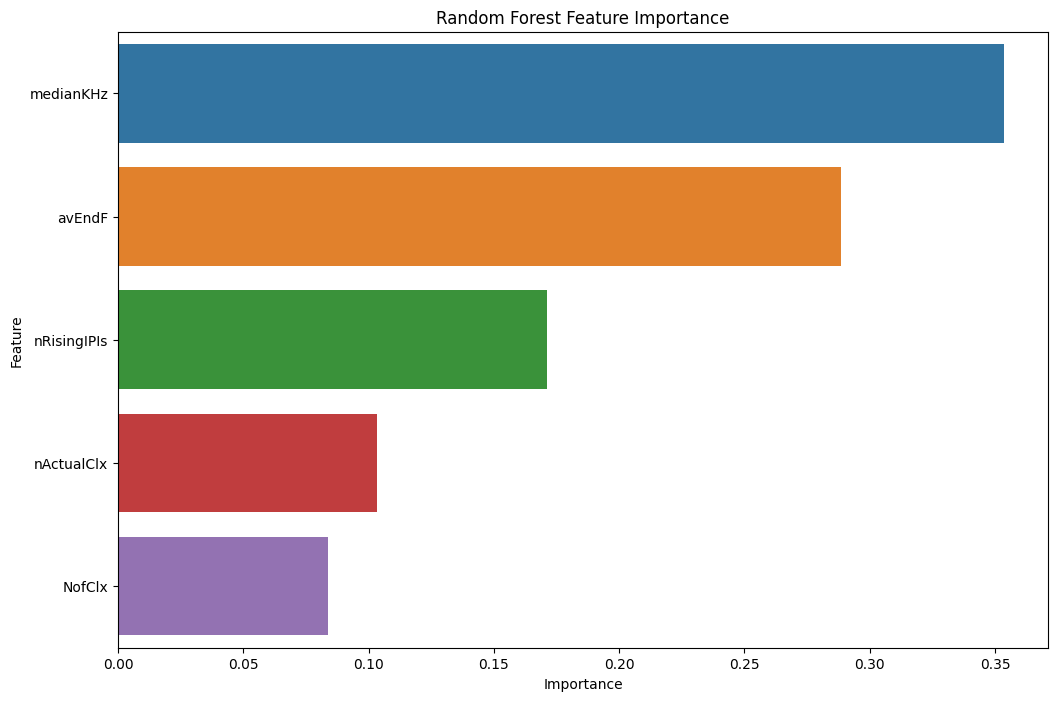

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained RandomForestClassifier
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.show()


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the RandomForestClassifier with class_weight parameter
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train_scaled, y_train['HP'])

# Predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test['HP'], y_pred_rf)
print(f'Accuracy on the test set for "HP" (Random Forest): {accuracy_rf * 100:.2f}%')

# Additional classification report
print("Classification Report:")
print(classification_report(y_test['HP'], y_pred_rf))


Accuracy on the test set for "HP" (Random Forest): 96.90%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98     33168
         1.0       0.14      0.30      0.19       408

    accuracy                           0.97     33576
   macro avg       0.57      0.64      0.59     33576
weighted avg       0.98      0.97      0.97     33576



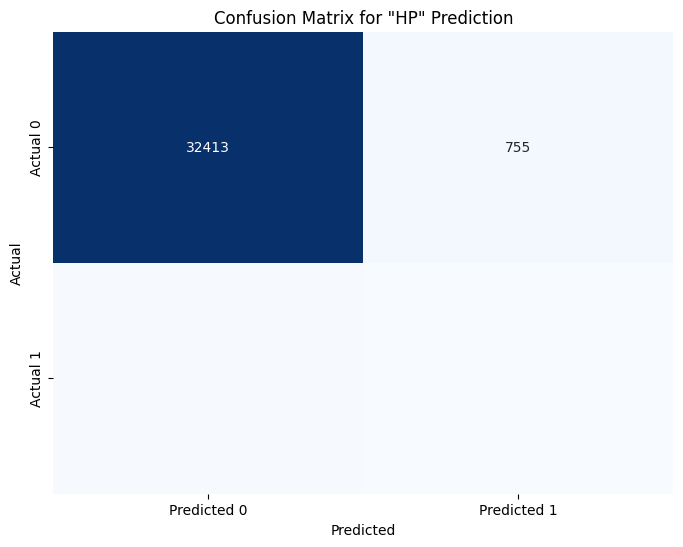

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test['HP'], y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for "HP" Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


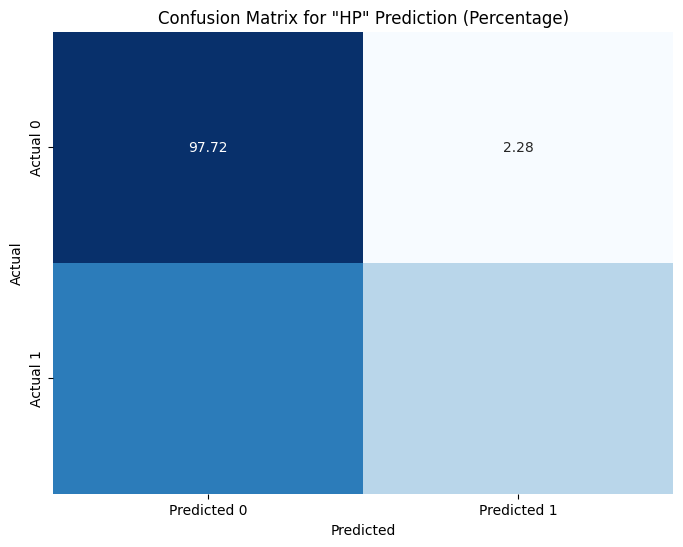

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test['HP'], y_pred_rf)

# Calculate percentages
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plot confusion matrix with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for "HP" Prediction (Percentage)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [25]:
import plotly.figure_factory as ff

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test['HP'], y_pred_rf)

# Calculate percentages
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1)\
[:, np.newaxis] * 100

# Define labels for the confusion matrix
class_labels = ['Actual 0', 'Actual 1']

# Create Plotly heatmap
fig = ff.create_annotated_heatmap(z=conf_matrix_percentage,
                                   x=class_labels,
                                   y=class_labels,
                                   colorscale='Blues',
                                   showscale=True)

# Update layout
fig.update_layout(title_text='Confusion Matrix for \
                  "HP" Prediction (Percentage)',
                  xaxis=dict(title='Predicted'),
                  yaxis=dict(title='Actual'))

# Show the plot
fig.show()
